<a href="https://colab.research.google.com/github/vishalsingha/Stock-price-prediction/blob/main/Stock_Price_Predicction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center> Apple Inc. Stock Price Prediction</center>

In [17]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import  MinMaxScaler
from keras.models import  Sequential
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf

# Load Data

In [2]:
#load the data
df = pdr.DataReader('AAPL', data_source='yahoo', start=2012, end = '2020')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480


# Checking for Null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2012-01-03 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2012 non-null   float64
 1   Low        2012 non-null   float64
 2   Open       2012 non-null   float64
 3   Close      2012 non-null   float64
 4   Volume     2012 non-null   float64
 5   Adj Close  2012 non-null   float64
dtypes: float64(6)
memory usage: 110.0 KB


**So the data has No null  values**

In [4]:
dataset = df[[ 'Close']].copy()

# Plot Data
Here is the plot of the APPLE Inc. stock price dataset from 2012 to 2020.

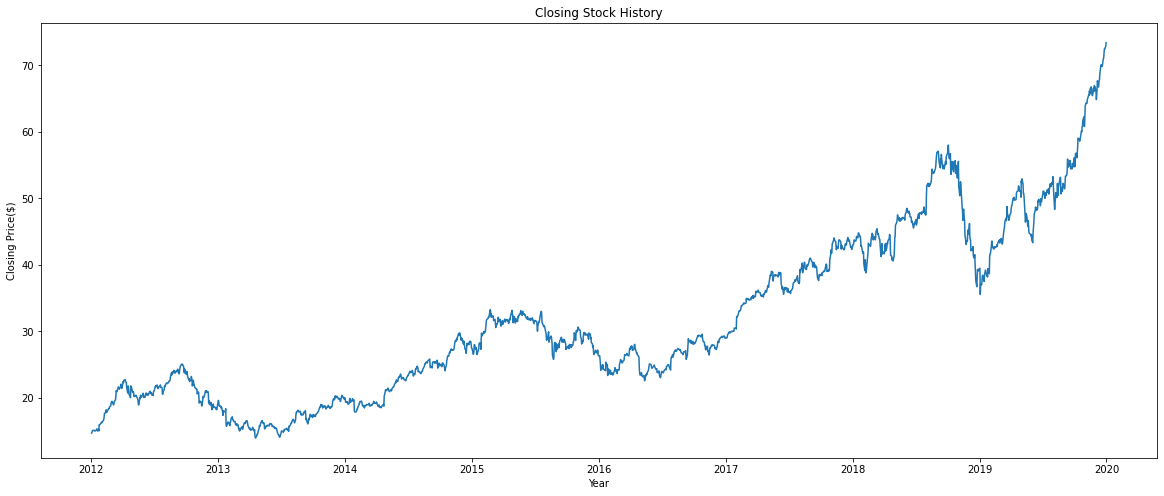

In [5]:
#plot the data
plt.figure(figsize = (20, 8))
plt.plot(dataset)
plt.xlabel('Year')
plt.ylabel('Closing Price($)')
plt.title("Closing Stock History")
plt.show()

In [6]:
#scale the data
s = MinMaxScaler(feature_range=(0, 1))
scaled_data = s.fit_transform(dataset)
scaled_data

array([[0.01243228],
       [0.0137596 ],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [7]:
#split data into train and test set
train, test = scaled_data[:1600], scaled_data[1600:]

In [8]:
# prepare data
def prep_data(data, step_size):
  x = []
  y = []
  data_size = data.shape[0]
  for i in range(step_size, data.shape[0]-1):
    x.append(data[i-step_size:i, 0])
    y.append(data[i, 0])
  return np.array(x), np.array(y)

step_size = 100
x_train, y_train = prep_data(train, step_size)
x_test, y_test = prep_data(test, step_size)

In [9]:
# reshape train and test data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1499, 100, 1)
(1499,)
(311, 100, 1)
(311,)


In [23]:
# prepare model
model = Sequential()
model.add(LSTM( 50, return_sequences=True, input_shape = (step_size, 1)))
# model.add(LSTM( 150, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1))

In [24]:
# compile model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [25]:
es = tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')

In [26]:
# train model
history = model.fit(x=x_train, y=y_train, batch_size = 1, epochs=8, validation_data = (x_test, y_test), callbacks = [es])

Epoch 1/8
1499/1499 [==============================] - 15s 10ms/step - loss: 8.6830e-04 - val_loss: 0.0010
Epoch 2/8
1499/1499 [==============================] - 14s 9ms/step - loss: 3.6753e-04 - val_loss: 0.0014
Epoch 3/8
1499/1499 [==============================] - 14s 9ms/step - loss: 2.2365e-04 - val_loss: 8.2978e-04
Epoch 4/8
1499/1499 [==============================] - 14s 9ms/step - loss: 2.7717e-04 - val_loss: 5.5157e-04
Epoch 5/8
1499/1499 [==============================] - 14s 9ms/step - loss: 2.1783e-04 - val_loss: 0.0013
Epoch 6/8
1499/1499 [==============================] - 14s 9ms/step - loss: 1.2879e-04 - val_loss: 4.4840e-04
Epoch 7/8
1499/1499 [==============================] - 14s 9ms/step - loss: 1.8933e-04 - val_loss: 3.6716e-04
Epoch 8/8
1499/1499 [==============================] - 14s 9ms/step - loss: 1.3186e-04 - val_loss: 3.7820e-04


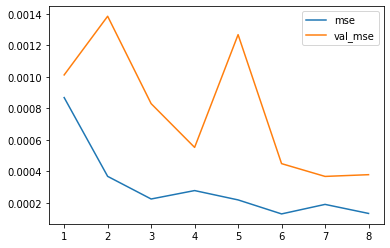

In [27]:
# plot the accuracy
plt.plot(range(1, 9), history.history['loss'])
plt.plot(range(1, 9), history.history['val_loss'])
plt.legend(['mse', 'val_mse'])


In [28]:
# predict test data
y_pred = model.predict(x_test)
y_pred = s.inverse_transform(y_pred)

# predict train data
y_train_pred = model.predict(x_train)
y_train_pred = s.inverse_transform(y_train_pred)

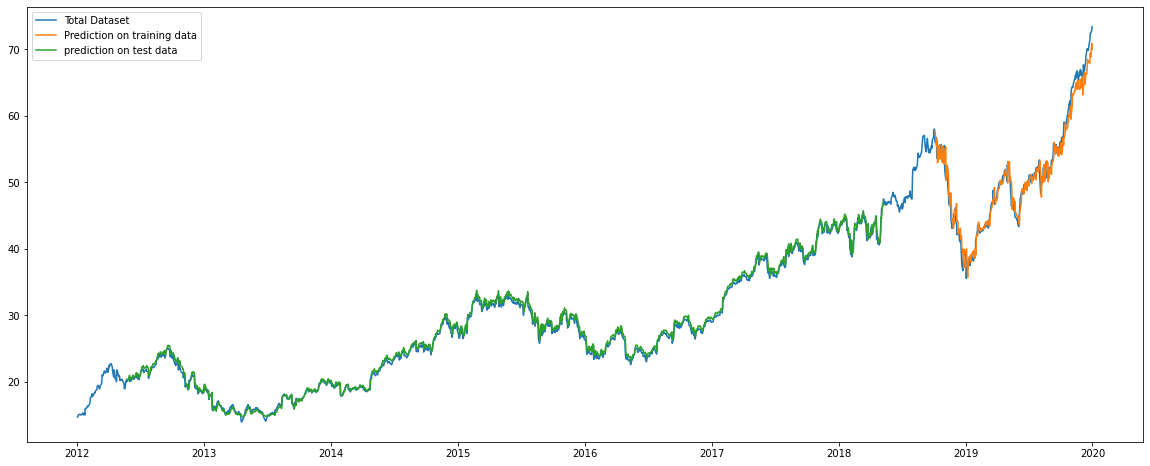

In [29]:
# plot prediction
plt.figure(figsize = (20, 8))
plt.plot(dataset)
plt.plot(df['Close'].index[(len(df['Close'])-x_test.shape[0]):], y_pred)
plt.plot( df['Close'].index[step_size:step_size+y_train.shape[0]], y_train_pred)
plt.legend(['Total Dataset', 'Prediction on training data', 'prediction on test data'])
plt.show()